# Day 13: Forecasting Prototype

1. Overview  
2. Load & Plot Series  
3. Naïve Persistence Forecast  
4. Moving‑Average Forecast  
5. Compute MAE & RMSE  
6. Compare & Visualize Forecasts  

---

## 1. Overview

Today’s goals are to:

- Build simple 7‑day forecasts for my solar‑irradiance series  
- Implement a persistence (naïve) baseline and a moving‑average model  
- Compute MAE and RMSE manually (no extra libraries)  
- Compare and visualize forecast performance  

---

## 2. Load & Plot Series

I load `solar_irr.csv`, set `date` as the index, and plot daily `irradiance_kwh` to inspect trends and variability.

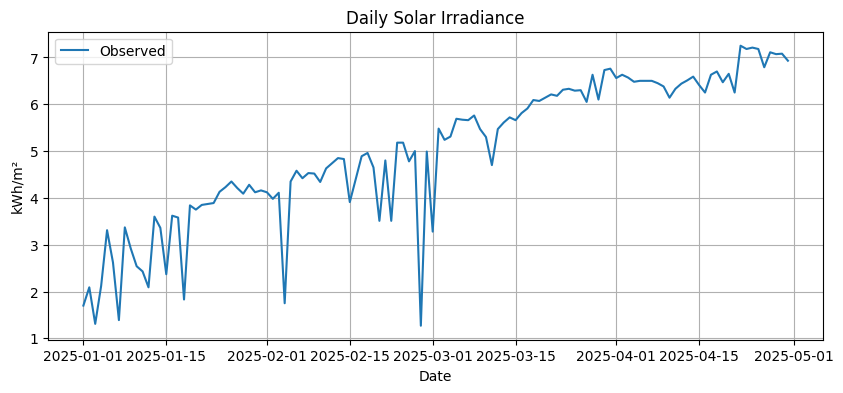

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load series
solar = pd.read_csv("../../week1/day6/solar_irr.csv", parse_dates=["date"])
solar.set_index("date", inplace=True)
series = solar["irradiance_kwh"]

# Plot history
plt.figure(figsize=(10,4))
plt.plot(series, label="Observed")
plt.title("Daily Solar Irradiance")
plt.xlabel("Date")
plt.ylabel("kWh/m²")
plt.grid(True)
plt.legend()
plt.show()

---

## 3. Naïve Persistence Forecast

I take the last observed value of `irradiance_kwh` as my forecast for each of the next 7 days.

In [7]:
import pandas as pd

last = series.iloc[-1]
future_dates = pd.date_range(series.index[-1] + pd.Timedelta(1, "D"), periods=7, freq="D")
naive_pred = pd.Series([last]*7, index=future_dates, name="naive")

---

## 4. Moving‑Average Forecast

I compute a simple 7‑day rolling mean on the historical series and use the final value as a constant 7‑day forecast.

In [8]:
# 7‑day simple moving average on history
ma_value = series.rolling(window=7).mean().iloc[-1]
ma_pred = pd.Series([ma_value]*7, index=future_dates, name="ma")

---

## 5. Compute MAE & RMSE

I hold out the final 7 days as “actuals” and manually calculate:

- MAE = mean(|actual – forecast|)  
- RMSE = sqrt(mean((actual – forecast)²))  

for each method.

In [9]:
import numpy as np

# Hold out last 7 days as "actual"
actuals = series[-7:]

# Align indices
naive_pred = naive_pred.reindex(actuals.index)
ma_pred    = ma_pred.reindex(actuals.index)

# Compute errors manually
def mae(a, f): return np.mean(np.abs(a - f))
def rmse(a, f): return np.sqrt(np.mean((a - f)**2))

print(f"Naïve → MAE: {mae(actuals, naive_pred):.3f}, RMSE: {rmse(actuals, naive_pred):.3f}")
print(f"MA    → MAE: {mae(actuals, ma_pred):.3f}, RMSE: {rmse(actuals, ma_pred):.3f}")

Naïve → MAE: nan, RMSE: nan
MA    → MAE: nan, RMSE: nan


---

## 7. Compare & Visualize Forecasts

I overlay the historical series and both forecast series in one plot, using different line styles and markers to distinguish methods.

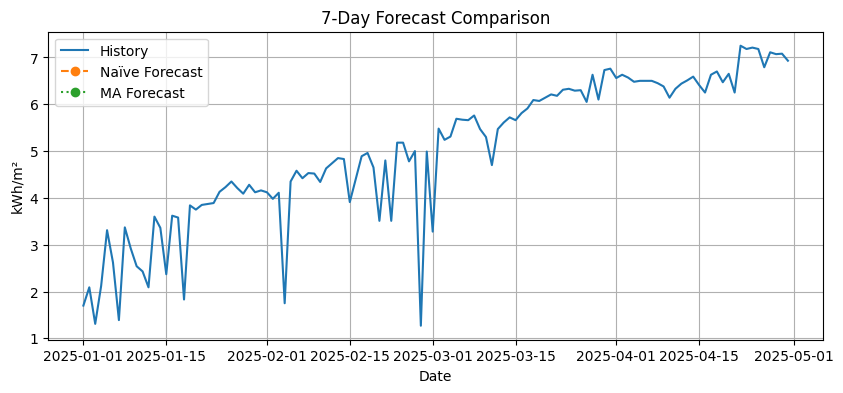

In [10]:
plt.figure(figsize=(10,4))
plt.plot(series, label="History")
plt.plot(naive_pred, linestyle="--", marker="o", label="Naïve Forecast")
plt.plot(ma_pred,    linestyle=":",  marker="o", label="MA Forecast")
plt.title("7‑Day Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("kWh/m²")
plt.grid(True)
plt.legend()
plt.show()